In [3]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Step 1: Load your dataset
df = pd.read_csv('HR_Analytics.csv')

# Step 2: Separate features and target
X = df.drop('Attrition', axis=1)
y = df['Attrition']

# Step 3: Handle categorical columns if any
# One-hot encoding for categorical variables
X = pd.get_dummies(X, drop_first=True)

# Step 4: Handle missing values
imputer = SimpleImputer(strategy='mean')  # You can also use 'median' or 'most_frequent'
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)

# Step 5: Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 6: Feature scaling (optional but recommended for Logistic Regression)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# ================= Logistic Regression =================
log_model = LogisticRegression(max_iter=1000)
log_model.fit(X_train_scaled, y_train)
y_pred_log = log_model.predict(X_test_scaled)

print("=== Logistic Regression Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_log))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_log))
print("Classification Report:\n", classification_report(y_test, y_pred_log))

# ================= Random Forest =================
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)  # Random Forest does NOT require scaling
y_pred_rf = rf_model.predict(X_test)

print("\n=== Random Forest Results ===")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))


=== Logistic Regression Results ===
Accuracy: 0.8513513513513513
Confusion Matrix:
 [[249   0]
 [ 44   3]]
Classification Report:
               precision    recall  f1-score   support

          No       0.85      1.00      0.92       249
         Yes       1.00      0.06      0.12        47

    accuracy                           0.85       296
   macro avg       0.92      0.53      0.52       296
weighted avg       0.87      0.85      0.79       296


=== Random Forest Results ===
Accuracy: 0.847972972972973
Confusion Matrix:
 [[249   0]
 [ 45   2]]
Classification Report:
               precision    recall  f1-score   support

          No       0.85      1.00      0.92       249
         Yes       1.00      0.04      0.08        47

    accuracy                           0.85       296
   macro avg       0.92      0.52      0.50       296
weighted avg       0.87      0.85      0.78       296



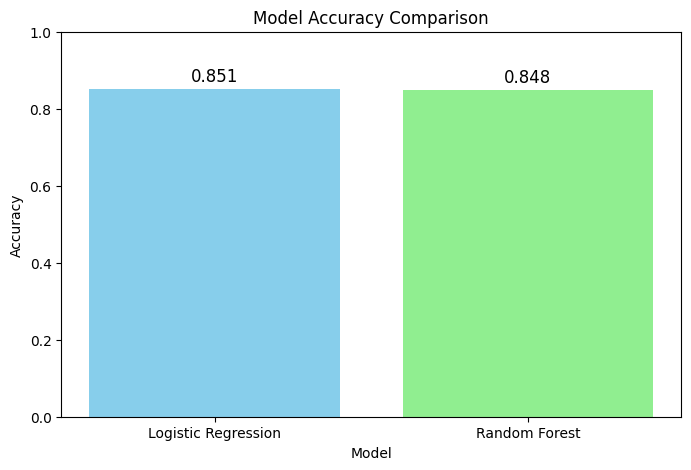

In [4]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

# Accuracy of both models
models = ['Logistic Regression', 'Random Forest']
accuracies = [
    accuracy_score(y_test, y_pred_log),
    accuracy_score(y_test, y_pred_rf)
]

# Plotting
plt.figure(figsize=(8,5))
bars = plt.bar(models, accuracies, color=['skyblue', 'lightgreen'])
plt.ylim(0, 1)
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.xlabel("Model")

# Add accuracy values on top of bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.02, round(yval, 3), ha='center', fontsize=12)

plt.show()
